# Kelompok 1 Algoritma Deep Learning

Quiz M11 - 6 Januari 2025

Anggota Kelompok :
1. A IAS Falah Surya Gemilang - 50421001
2. Aldo Rizky Ramadhan - 50421106
3. Faiz Rizki Azmi - 50421454
4. Muhamad Ibnu Khaidar Hafiz - 50421867
5. Siti Asma Tomu - 51421427

In [1]:
import tensorflow as tf

2025-01-06 07:23:04.907307: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 07:23:04.923007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 07:23:04.942318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 07:23:04.948573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 07:23:04.963891: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.__version__

'2.17.0'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Mon Jan  6 07:23:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   61C    P0             30W /   72W |       4MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105785 sha256=9bb6eebf410d74f35a4604e2ca5be762d8c78e90cb8bc6fe93f571d6ac0ed969
  Stored in directory: /home/ibnuk/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle


In [6]:
! mkdir ~/.kaggle
! cp kaggle_API_key.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle_API_key.json

In [7]:
! kaggle datasets download alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
100%|████████████████████████████████████████| 586M/586M [00:26<00:00, 24.5MB/s]
100%|████████████████████████████████████████| 586M/586M [00:26<00:00, 23.1MB/s]


In [8]:
! unzip animals10.zip

Archive:  animals10.zip
  inflating: raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg  
  inflating: raw-img/cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg  
  inflating: raw-img/cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg  
  inflating: raw-img/cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg  
  inflating: raw-img/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg  
  inflating: raw-img/cane/OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg  
  inflating: raw-img/cane/OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg  
  inflating: raw-img/cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg  
  inflating: raw-img/cane/OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg  
  inflating: raw-img/cane/OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg  
  inflating: raw-img/cane/OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg  
  inflating: raw-img/cane/OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg  
  inflating: raw-img/cane/OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg  
  inflating: raw-img/cane/OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg  
  inflating: raw-img/cane/OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg  
  inflating: raw-img

In [16]:
# load data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "raw-img",
    validation_split=0.2,
    subset="training",
    seed=999,
    image_size=(224, 224),
    batch_size=32
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "raw-img",
    validation_split=0.2,
    subset="validation",
    seed=999,
    image_size=(224, 224),
    batch_size=32
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


2025-01-06 07:32:23.862806: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20750 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [14]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2025-01-06 07:30:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-06 07:30:50 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [19]:
class_names = np.array(train_dataset.class_names)
print(class_names)


['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']


In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [21]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
def convert_path_to_df(dataset):
    image_dir = Path(dataset)

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df("raw-img")

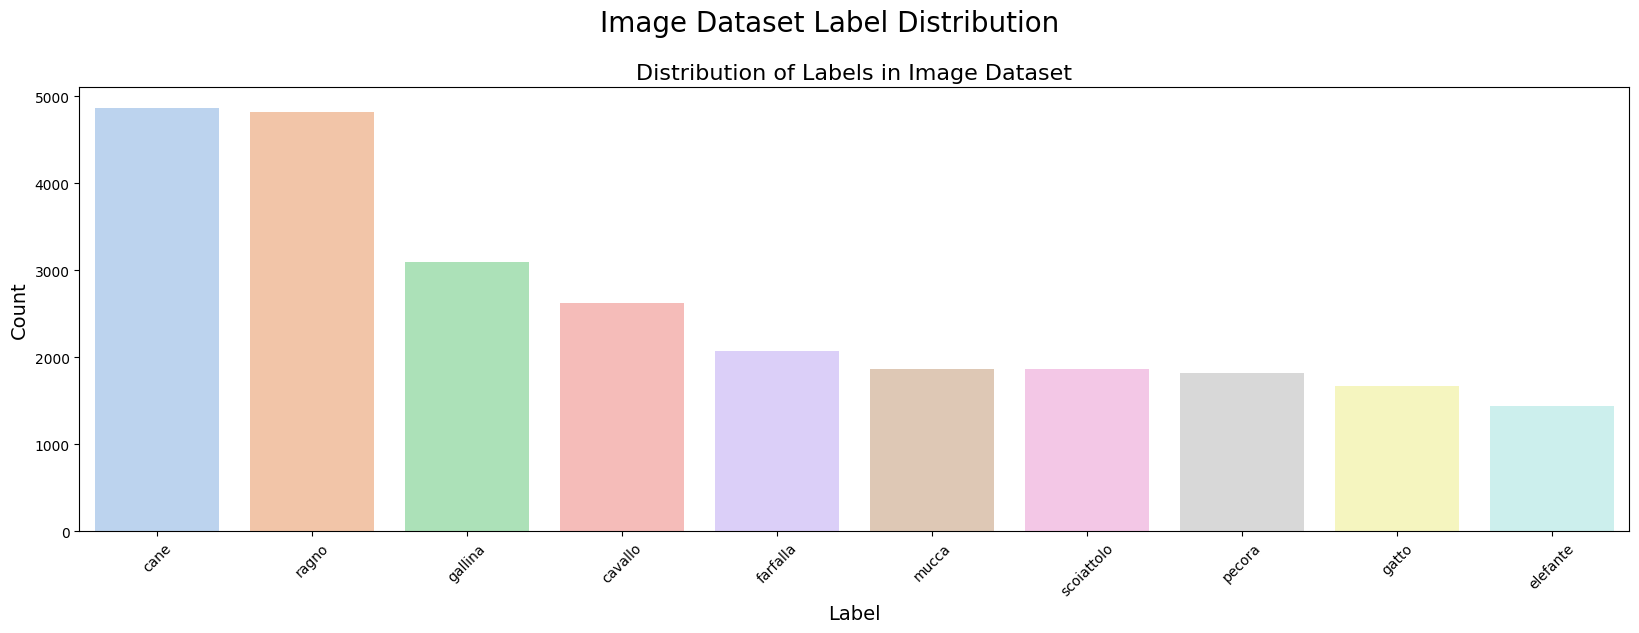

In [29]:
label_counts = image_df['Label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=axes)
axes.set_title('Distribution of Labels in Image Dataset', fontsize=16)
axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_xticklabels(label_counts.index, rotation=45)

fig.suptitle('Image Dataset Label Distribution', fontsize=20)

fig.subplots_adjust(top=0.85)

plt.show()

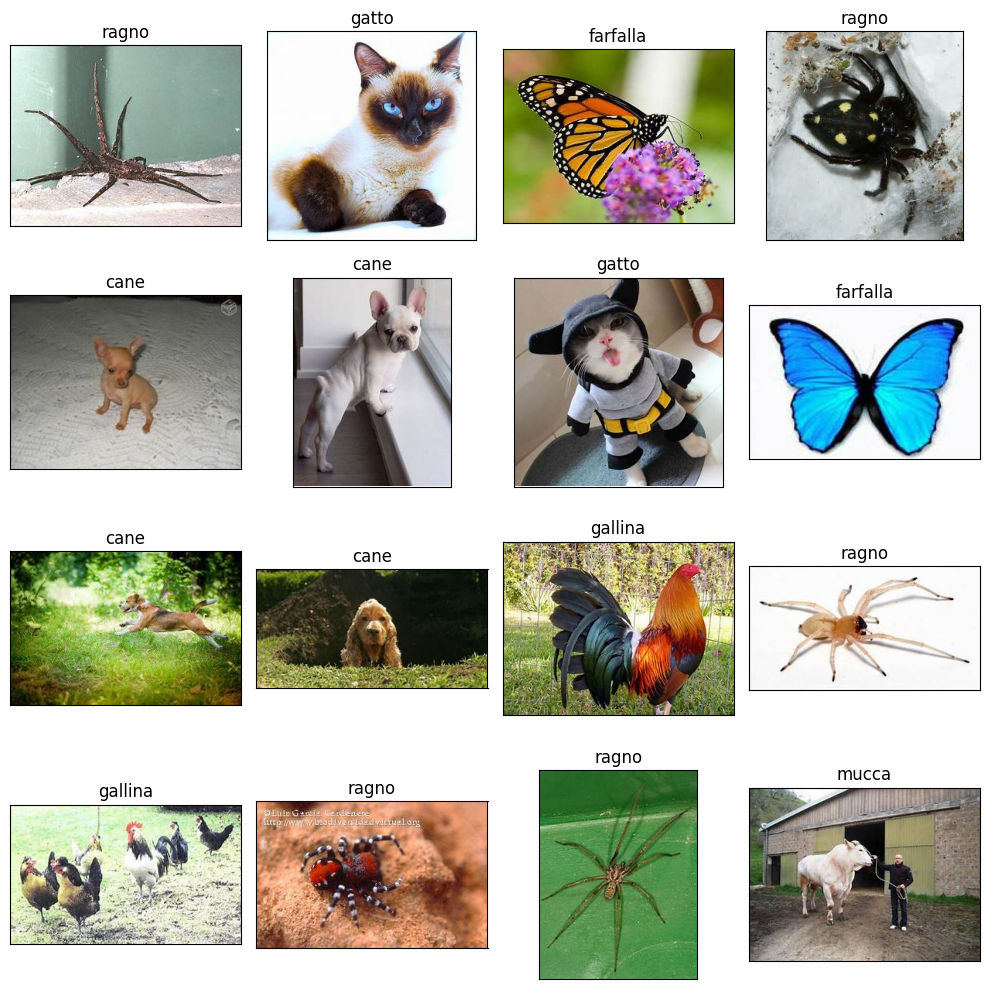

In [30]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [31]:
train_dataset, validation_dataset = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [35]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [32]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [36]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_dataset,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_dataset,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=validation_dataset,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 16722 validated image filenames belonging to 10 classes.
Found 4180 validated image filenames belonging to 10 classes.
Found 5226 validated image filenames belonging to 10 classes.


In [38]:
augment = tf.keras.Sequential([
  tf.keras.layers.Resizing(224,224),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.1),
])

In [39]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB7(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [40]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights = True)

In [42]:
inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [43]:
model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=10,
                    callbacks=[early_stopping])